In [1]:
# @title Import Library
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn-extra
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy import stats

In [2]:
# @title Import Dataset
# Load the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# @title Identifying Data

# Dataset size
print('Data points and Columns:', df.shape)

# Dataset information
print(df.info())

# Check for null values
print('Null Values:', (df.isnull().sum()))

# Check for duplicate values
print('Duplicate Values:', (df.duplicated().sum()))

# Summarize the dataset
print('Dataset Summary:')
df.describe().T

Data points and Columns: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Nu

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Based on the initial data exploration, we find out that;


*   The dataset has 29 columns consisting 2,240 observations.

*   Most of the columns are numerical.

*   There are three categorical columns; 'marital_status', 'education', and 'Dt_customer'.

*   The 'marital_status' and 'education' columns contain categories that can be considered synonymous.

*   'Dt_customer' needs to be converted to a numerical date type.

*   The 'income' column has 24 missing values.

*   Any duplicate entry was not detect.

*   Some outliers are present in some numerical columns.

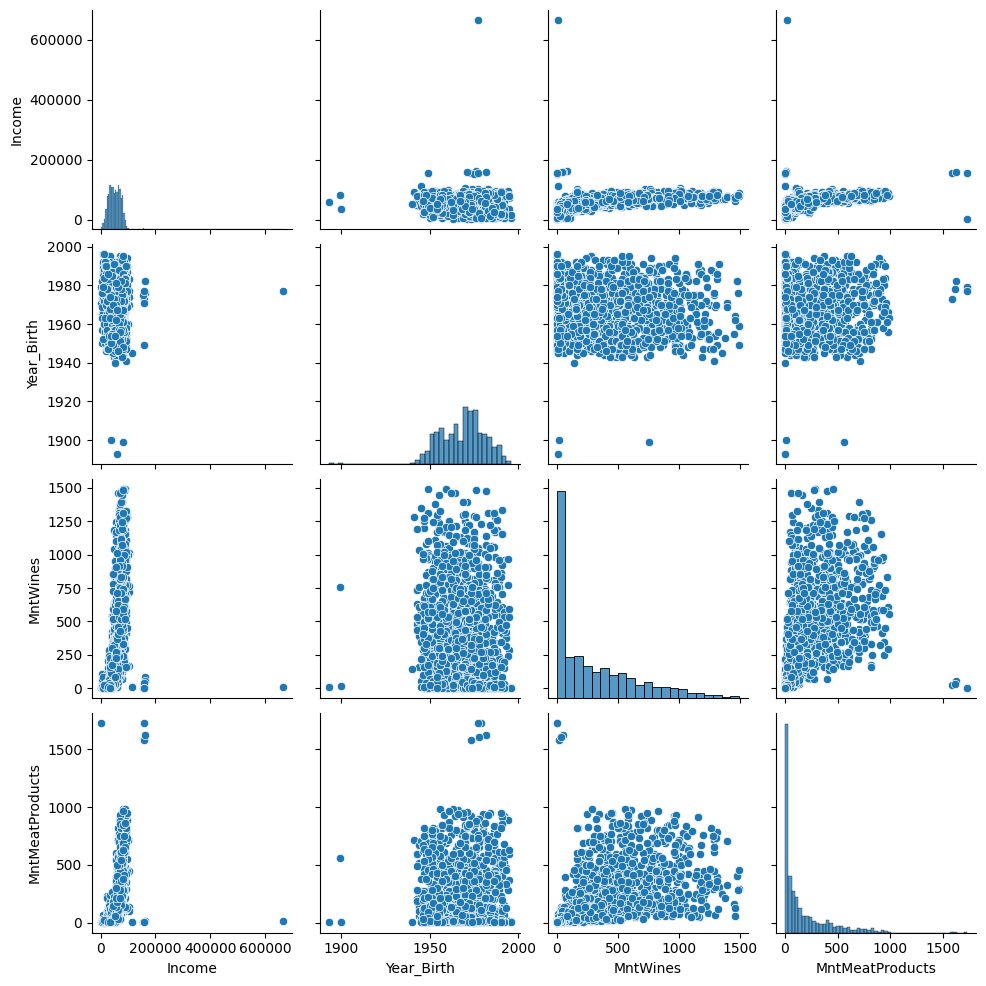

In [4]:
# @title Visualize relationships between multiple variables

sns.pairplot(df[['Income', 'Year_Birth', 'MntWines', 'MntMeatProducts']])
plt.show()

In [5]:
# @title Data Engineering
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

# Define categorical_columns here
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

# Combining columns together to reduce the number of dimensions
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Converting date to numerical variable by calculating duration
data = df.copy()

# Calculate 'Days_as_client' before selecting columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
latest_date = df['Dt_Customer'].max()
df['Days_as_client'] = (latest_date - df['Dt_Customer']).dt.days
df.head()

df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses',
         'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]


Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1
Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [6]:
# @title Data Cleaning

# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


<ipython-input-6-36fd396c9e86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
<ipython-input-6-36fd396c9e86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Income,Days_as_client,Recency,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.743,-1.688,-0.999,-1.945
25%,-0.660,-0.863,-0.859,-0.893,-0.900
50%,-0.032,-0.003,0.004,-0.350,0.014
75%,0.634,0.867,0.867,0.729,0.797
max,24.058,1.713,1.730,3.176,3.801


In the context of income data, a Z-score of 24 suggests that this particular income is 24 standard deviations away from the mean, which is extraordinarily high. Such an extreme value is not only an outlier but may also represent a rare event or a data entry error.

Removing these outliers will help ensure the integrity of the statistical analysis. Doing so, we can enhance the reliability of our clustering results, leading to more accurate insights and conclusions.

In [7]:
# @title Removing missing values
# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if any)
df = df.dropna()

In [8]:
# @title Data Cleaning - Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


Throughout the Data Cleaning and Feature Engineering process, several important actions were taken:

We developed a new feature that indicates the number of days each client has been with the company.
Extraneous features were eliminated to make the dataset more efficient.
The 'Marital_Status' and 'Education' variables were grouped into fewer, broader categories for consistency.
Certain columns were merged to decrease the total number of columns in the dataset.
Outliers were detected and removed to enhance the overall quality of the data.
These steps were crucial for optimizing the dataset for analysis and ensuring its accuracy and relevance.

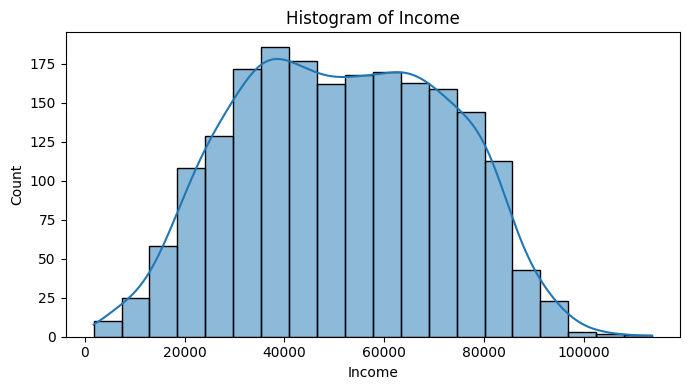

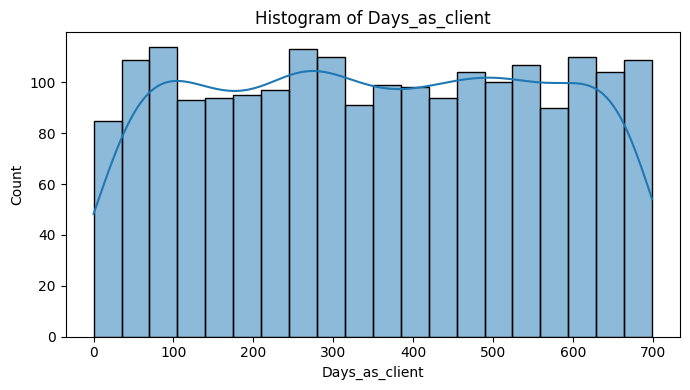

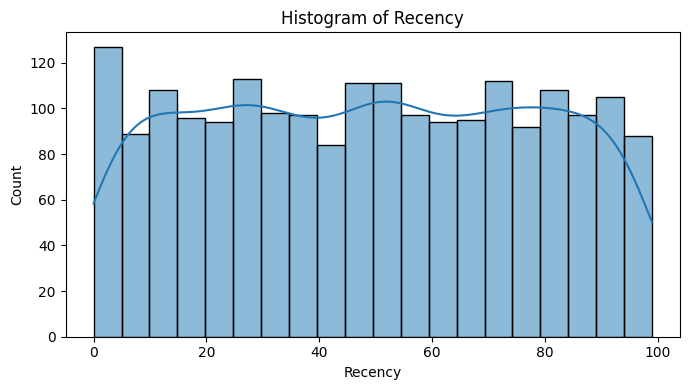

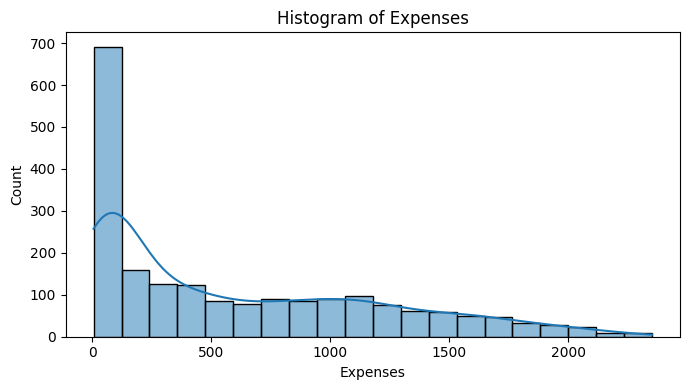

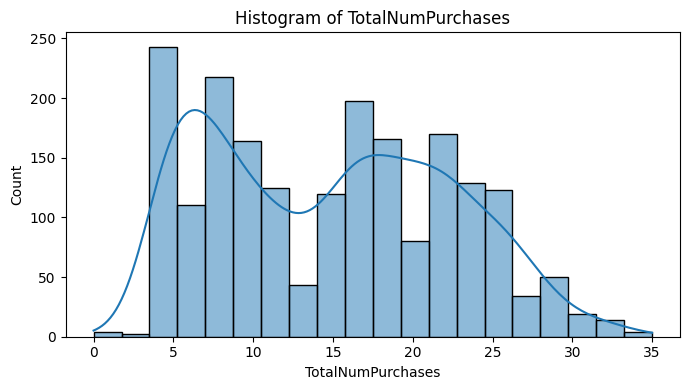

In [9]:
# @title Exploratory Data Analysis

# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


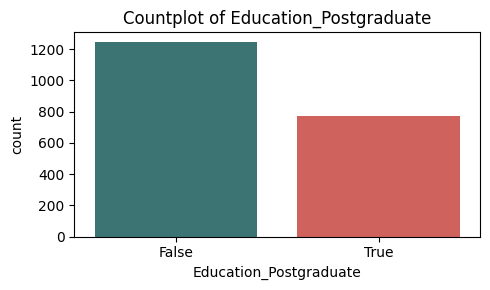

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


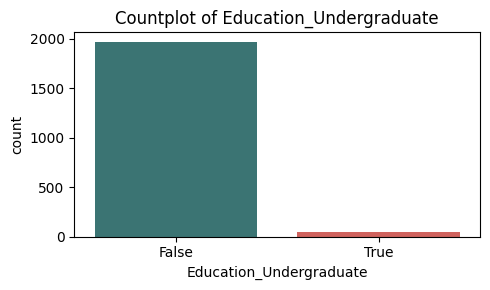

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


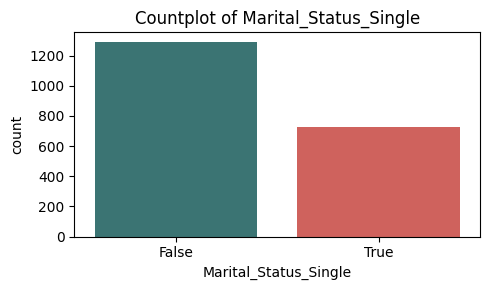

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=custom_palette)


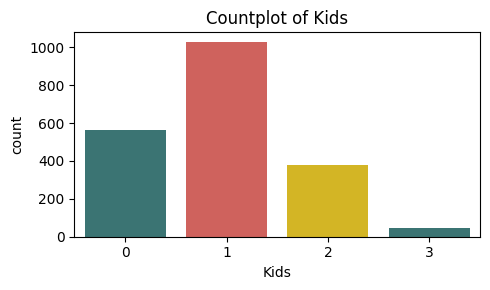

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


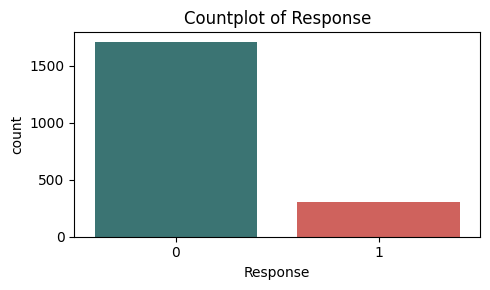

<ipython-input-10-9627db47f69c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-10-9627db47f69c>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


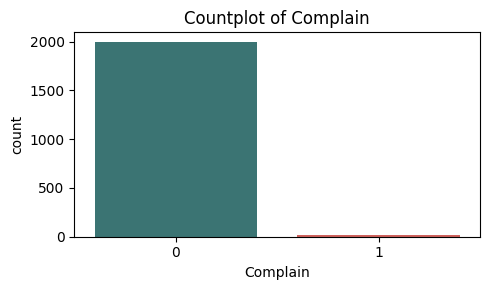

In [10]:
# @title Countplots for categorical column
# Define the color palette
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

# Define the columns to plot
columns_to_plot = ['Education_Postgraduate', 'Education_Undergraduate',
                      'Marital_Status_Single', 'Kids', 'Response', 'Complain']

# Plot countplots for each categorical column
for column in columns_to_plot:  # Directly iterate over the list
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=column, palette=custom_palette)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

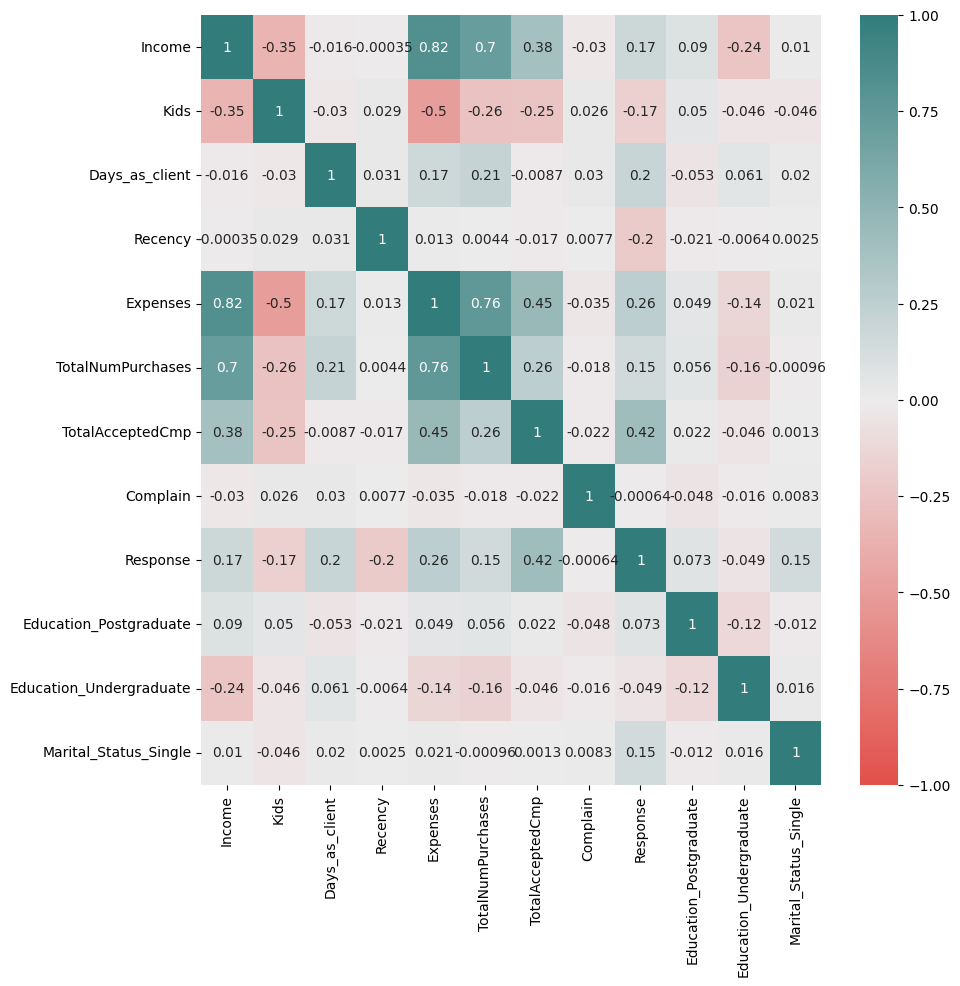

In [11]:
# @title Correlation Matrix
# Import necessary modules
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

Key Insights from the Visualizations:  


*   After filtering out outliers, income exhibits a normal distribution. This indicates that most customers have earnings close to the average, with fewer individuals at the higher and lower extremes.  
*   Both variables display a relatively uniform distribution, suggesting that customers have been associated with the company for diverse durations and have engaged with it over a broad time span.
*   The distribution of expenses follows an exponential trend, meaning most customers spend relatively little, and the number of high spenders decreases rapidly as expenditure increases.
*   This metric aligns with a binomial distribution, reflecting common purchasing patterns where customers tend to make a specific number of transactions.
*   A significant proportion of customers are graduates, have one child, are in a relationship, have not submitted complaints in the last two years, and have not participated in past promotional campaigns. This suggests the company serves a well-defined customer segment.
*   Income, expenses, and total purchases show strong correlations, implying that individuals with higher incomes tend to spend more and make more purchases.

In [12]:
# @title Scale the Features

# Scale the features
features = df.drop(columns=[])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns= features.columns )
scaled_df.head()
print("All features are now scaled")

# Apply PCA
from sklearn.decomposition import PCA # Import the PCA class
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

All features are now scaled


In [13]:
scaled_df.head()

,Income,Kids,Days_as_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,0.314294,-1.280487,1.532802,0.314655,1.702872,1.344913,-0.442616,-0.1001,2.359401,-0.786942,-0.157832,1.332989
1,-0.256794,1.404341,-1.182870,-0.375412,-0.966156,-1.171600,-0.442616,-0.1001,-0.423836,-0.786942,-0.157832,1.332989
2,0.966779,-1.280487,-0.200291,-0.789453,0.291141,0.815120,-0.442616,-0.1001,-0.423836,-0.786942,-0.157832,-0.750194
3,-1.210608,0.061927,-1.054493,-0.789453,-0.922512,-0.906704,-0.442616,-0.1001,-0.423836,-0.786942,-0.157832,-0.750194
4,0.321799,0.061927,-0.945866,1.556777,-0.303096,0.550224,-0.442616,-0.1001,-0.423836,1.270742,-0.157832,-0.750194


In [14]:
# @title Clustering Algorithm Comparison with Scaled Data

from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids  # Additional clustering algorithm

# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
kmeans_score = silhouette_score(scaled_df, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_df)
agglomerative_ward = silhouette_score(scaled_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Complete linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglomerative_labels = agglomerative.fit_predict(scaled_df)
agglomerative_complete = silhouette_score(scaled_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Average linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='average')
agglomerative_labels = agglomerative.fit_predict(scaled_df)
agglomerative_average = silhouette_score(scaled_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Single linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='single')
agglomerative_labels = agglomerative.fit_predict(scaled_df)
agglomerative_single = silhouette_score(scaled_df, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)
dbscan_score = silhouette_score(scaled_df, dbscan_labels)

# Note: GMM is a probabilistic model-based clustering algorithm.
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)
gmm_score = silhouette_score(scaled_df, gmm_labels)

# Note: Mean Shift is a non-parametric clustering algorithm.
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_df)
mean_shift_score = silhouette_score(scaled_df, mean_shift_labels)

# Note: Spectral Clustering uses the eigenvalues of the similarity matrix for clustering.
spectral = SpectralClustering(n_clusters=4, random_state=42)
spectral_labels = spectral.fit_predict(scaled_df)
spectral_score = silhouette_score(scaled_df, spectral_labels)

# Note: Affinity Propagation identifies exemplars and assigns data points to them.
affinity_propagation = AffinityPropagation()
affinity_propagation_labels = affinity_propagation.fit_predict(scaled_df)
affinity_propagation_score = silhouette_score(scaled_df, affinity_propagation_labels)

# Note: OPTICS is a density-based clustering algorithm providing a more flexible way to identify clusters.
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(scaled_df)
optics_score = silhouette_score(scaled_df, optics_labels)

# Note: Fuzzy C-means is an extension of K-means allowing data points to belong to multiple clusters with varying degrees of membership.
from sklearn_extra.cluster import KMedoids
fuzzy_cmeans = KMedoids(n_clusters=4, random_state=42)
fuzzy_cmeans_labels = fuzzy_cmeans.fit_predict(scaled_df)
fuzzy_cmeans_score = silhouette_score(scaled_df, fuzzy_cmeans_labels)

print("K-Means Silhouette Score:", kmeans_score)
print("Ward Agglomerative Silhouette Score:", agglomerative_ward)
print("Complete Agglomerative Silhouette Score:", agglomerative_complete)
print("Average Agglomerative Silhouette Score:", agglomerative_average)
print("Single Agglomerative Silhouette Score:", agglomerative_single)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)
print("Mean Shift Silhouette Score:", mean_shift_score)
print("Spectral Clustering Silhouette Score:", spectral_score)
print("Affinity Propagation Silhouette Score:", affinity_propagation_score)
print("OPTICS Silhouette Score:", optics_score)
print("Fuzzy C-means Silhouette Score:", fuzzy_cmeans_score)


K-Means Silhouette Score: 0.1241951808136349
Ward Agglomerative Silhouette Score: 0.18644899508634247
Complete Agglomerative Silhouette Score: 0.28710626930285726
Average Agglomerative Silhouette Score: 0.4569102982294551
Single Agglomerative Silhouette Score: 0.4569102982294551
DBSCAN Silhouette Score: -0.2636914023511439
GMM Silhouette Score: 0.27339310317847504
Mean Shift Silhouette Score: 0.4569102982294551
Spectral Clustering Silhouette Score: 0.2722435177447859
Affinity Propagation Silhouette Score: 0.18986674690791677
OPTICS Silhouette Score: -0.30062490073721104
Fuzzy C-means Silhouette Score: 0.0946761160301209


In [15]:
# @title Dimensionality Reduction

# Apply PCA
from sklearn.decomposition import PCA # Import the PCA class
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

In [16]:
pca_df.head()

,PC1,PC2
0,2.619134,1.788586
1,-1.924900,0.129920
2,1.091668,-0.523243
3,-1.869029,-0.000607
4,-0.085514,-1.896852


In [17]:
# @title Clustering Algorithm Comparison with PCA Data

from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids  # Additional clustering algorithm

# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)
kmeans_score = silhouette_score(pca_df, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(pca_df)
agglomerative_ward = silhouette_score(pca_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Complete linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglomerative_labels = agglomerative.fit_predict(pca_df)
agglomerative_complete = silhouette_score(pca_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Average linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='average')
agglomerative_labels = agglomerative.fit_predict(pca_df)
agglomerative_average = silhouette_score(pca_df, agglomerative_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Single linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='single')
agglomerative_labels = agglomerative.fit_predict(pca_df)
agglomerative_single = silhouette_score(pca_df, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)
dbscan_score = silhouette_score(pca_df, dbscan_labels)

# Note: GMM is a probabilistic model-based clustering algorithm.
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(pca_df)
gmm_score = silhouette_score(pca_df, gmm_labels)

# Note: Mean Shift is a non-parametric clustering algorithm.
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(pca_df)
mean_shift_score = silhouette_score(pca_df, mean_shift_labels)

# Note: Spectral Clustering uses the eigenvalues of the similarity matrix for clustering.
spectral = SpectralClustering(n_clusters=4, random_state=42)
spectral_labels = spectral.fit_predict(pca_df)
spectral_score = silhouette_score(pca_df, spectral_labels)

# Note: Affinity Propagation identifies exemplars and assigns data points to them.
affinity_propagation = AffinityPropagation()
affinity_propagation_labels = affinity_propagation.fit_predict(pca_df)
affinity_propagation_score = silhouette_score(pca_df, affinity_propagation_labels)

# Note: OPTICS is a density-based clustering algorithm providing a more flexible way to identify clusters.
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(pca_df)
optics_score = silhouette_score(pca_df, optics_labels)

# Note: Fuzzy C-means is an extension of K-means allowing data points to belong to multiple clusters with varying degrees of membership.
from sklearn_extra.cluster import KMedoids
fuzzy_cmeans = KMedoids(n_clusters=4, random_state=42)
fuzzy_cmeans_labels = fuzzy_cmeans.fit_predict(pca_df)
fuzzy_cmeans_score = silhouette_score(pca_df, fuzzy_cmeans_labels)

print("K-Means Silhouette Score:", kmeans_score)
print("Ward Agglomerative Silhouette Score:", agglomerative_ward)
print("Complete Agglomerative Silhouette Score:", agglomerative_complete)
print("Average Agglomerative Silhouette Score:", agglomerative_average)
print("Single Agglomerative Silhouette Score:", agglomerative_single)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)
print("Mean Shift Silhouette Score:", mean_shift_score)
print("Spectral Clustering Silhouette Score:", spectral_score)
print("Affinity Propagation Silhouette Score:", affinity_propagation_score)
print("OPTICS Silhouette Score:", optics_score)
print("Fuzzy C-means Silhouette Score:", fuzzy_cmeans_score)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


K-Means Silhouette Score: 0.4737761289916364
Ward Agglomerative Silhouette Score: 0.42928070736940566
Complete Agglomerative Silhouette Score: 0.4282140374025908
Average Agglomerative Silhouette Score: 0.4424511283569701
Single Agglomerative Silhouette Score: 0.325894965655502
DBSCAN Silhouette Score: 0.27608463603019806
GMM Silhouette Score: 0.44615740206253635
Mean Shift Silhouette Score: 0.46036537806894695
Spectral Clustering Silhouette Score: 0.4591009106783437
Affinity Propagation Silhouette Score: 0.1854106968001807
OPTICS Silhouette Score: -0.18598778480676573
Fuzzy C-means Silhouette Score: 0.37592225913627314


In [18]:
# @title Hierarchical Clustering Scaled Data

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']  # Linkage methods to test

# Store results
best_score = -1
best_params = {}

# Grid search for best parameters
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        # Use scaled_features instead of processed_data
        agglo_labels = agglo.fit_predict(scaled_df)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(agglo_labels)) > 1:
            # Use scaled_features instead of processed_data
            score = silhouette_score(scaled_df, agglo_labels)
            print(f"n_clusters: {n_clusters}, linkage: {linkage}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score:.3f}")



n_clusters: 2, linkage: ward, Silhouette Score: 0.169
n_clusters: 2, linkage: complete, Silhouette Score: 0.598
n_clusters: 2, linkage: average, Silhouette Score: 0.598
n_clusters: 2, linkage: single, Silhouette Score: 0.598
n_clusters: 3, linkage: ward, Silhouette Score: 0.181
n_clusters: 3, linkage: complete, Silhouette Score: 0.460
n_clusters: 3, linkage: average, Silhouette Score: 0.460
n_clusters: 3, linkage: single, Silhouette Score: 0.460
n_clusters: 4, linkage: ward, Silhouette Score: 0.186
n_clusters: 4, linkage: complete, Silhouette Score: 0.287
n_clusters: 4, linkage: average, Silhouette Score: 0.457
n_clusters: 4, linkage: single, Silhouette Score: 0.457
n_clusters: 5, linkage: ward, Silhouette Score: 0.189
n_clusters: 5, linkage: complete, Silhouette Score: 0.171
n_clusters: 5, linkage: average, Silhouette Score: 0.318
n_clusters: 5, linkage: single, Silhouette Score: 0.456
n_clusters: 6, linkage: ward, Silhouette Score: 0.201
n_clusters: 6, linkage: complete, Silhouette S

In [19]:
# @title Hierarchical Clustering Parameter Tuning

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']  # Linkage methods to test

# Store results
best_score = -1
best_params = {}

# Grid search for best parameters
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        # Use PCA data
        labels = agglo.fit_predict(pca_df)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(labels)) > 1:
            # Use PCA data
            score = silhouette_score(pca_df, labels)
            print(f"n_clusters: {n_clusters}, linkage: {linkage}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score:.3f}")

n_clusters: 2, linkage: ward, Silhouette Score: 0.448
n_clusters: 2, linkage: complete, Silhouette Score: 0.434
n_clusters: 2, linkage: average, Silhouette Score: 0.410
n_clusters: 2, linkage: single, Silhouette Score: 0.508
n_clusters: 3, linkage: ward, Silhouette Score: 0.441
n_clusters: 3, linkage: complete, Silhouette Score: 0.341
n_clusters: 3, linkage: average, Silhouette Score: 0.358
n_clusters: 3, linkage: single, Silhouette Score: 0.422
n_clusters: 4, linkage: ward, Silhouette Score: 0.429
n_clusters: 4, linkage: complete, Silhouette Score: 0.428
n_clusters: 4, linkage: average, Silhouette Score: 0.442
n_clusters: 4, linkage: single, Silhouette Score: 0.326
n_clusters: 5, linkage: ward, Silhouette Score: 0.370
n_clusters: 5, linkage: complete, Silhouette Score: 0.394
n_clusters: 5, linkage: average, Silhouette Score: 0.467
n_clusters: 5, linkage: single, Silhouette Score: 0.299
n_clusters: 6, linkage: ward, Silhouette Score: 0.338
n_clusters: 6, linkage: complete, Silhouette S

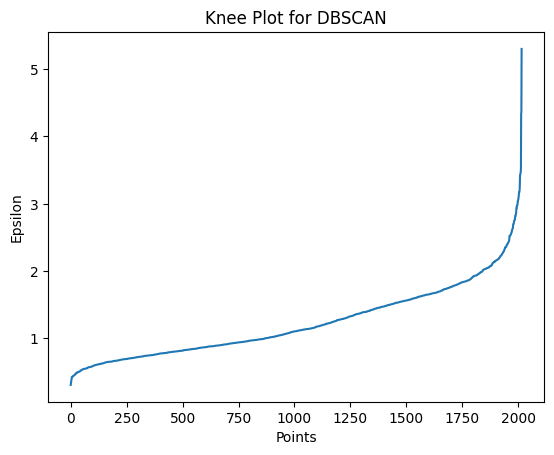

eps: 0.20, min_samples: 2, Silhouette Score: -0.358
eps: 0.20, min_samples: 3, Silhouette Score: -0.168
eps: 0.30, min_samples: 2, Silhouette Score: -0.474
eps: 0.30, min_samples: 3, Silhouette Score: -0.241
eps: 0.30, min_samples: 4, Silhouette Score: -0.191
eps: 0.40, min_samples: 2, Silhouette Score: -0.431
eps: 0.40, min_samples: 3, Silhouette Score: -0.385
eps: 0.40, min_samples: 4, Silhouette Score: -0.263
eps: 0.40, min_samples: 5, Silhouette Score: -0.190
eps: 0.40, min_samples: 6, Silhouette Score: -0.165
eps: 0.50, min_samples: 2, Silhouette Score: -0.346
eps: 0.50, min_samples: 3, Silhouette Score: -0.372
eps: 0.50, min_samples: 4, Silhouette Score: -0.355
eps: 0.50, min_samples: 5, Silhouette Score: -0.264
eps: 0.50, min_samples: 6, Silhouette Score: -0.262
eps: 0.50, min_samples: 7, Silhouette Score: -0.177
eps: 0.50, min_samples: 8, Silhouette Score: -0.177
eps: 0.60, min_samples: 2, Silhouette Score: -0.278
eps: 0.60, min_samples: 3, Silhouette Score: -0.338
eps: 0.60, m

In [20]:
# @title DBSCAN Scaled Date
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use scaled_features instead of processed_data
processed_data = scaled_features

# Find optimal eps using the knee method
nn = NearestNeighbors(n_neighbors=5).fit(processed_data)
distances, _ = nn.kneighbors(processed_data)
distances = np.sort(distances[:, -1])

# Plot distances to find the "knee"
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('Knee Plot for DBSCAN')
plt.show()

# Grid search for best parameters
best_score = -1
best_eps = 0.5  # Start with a value from the knee plot
best_min_samples = 5

for eps in np.linspace(0.1, 1.0, 10):  # Test eps values from 0.1 to 1.0
    for min_samples in range(2, 10):  # Test min_samples from 2 to 9
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(processed_data)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(labels)) > 1:
            score = silhouette_score(processed_data, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"\nBest eps: {best_eps:.2f}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.3f}")

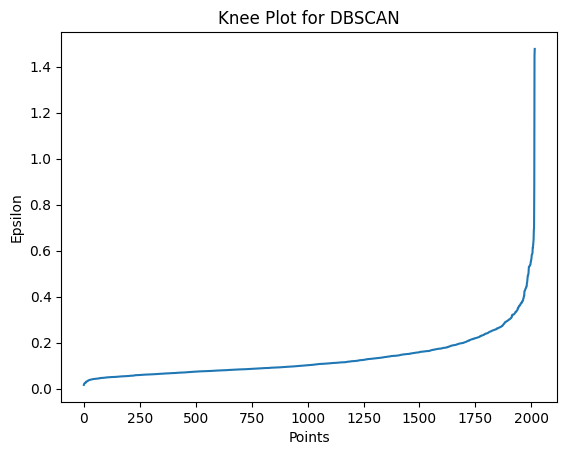

eps: 0.10, min_samples: 2, Silhouette Score: -0.340
eps: 0.10, min_samples: 3, Silhouette Score: -0.288
eps: 0.10, min_samples: 4, Silhouette Score: -0.264
eps: 0.10, min_samples: 5, Silhouette Score: -0.249
eps: 0.10, min_samples: 6, Silhouette Score: -0.212
eps: 0.10, min_samples: 7, Silhouette Score: -0.224
eps: 0.10, min_samples: 8, Silhouette Score: -0.230
eps: 0.10, min_samples: 9, Silhouette Score: -0.231
eps: 0.20, min_samples: 2, Silhouette Score: -0.195
eps: 0.20, min_samples: 3, Silhouette Score: -0.112
eps: 0.20, min_samples: 4, Silhouette Score: -0.044
eps: 0.20, min_samples: 5, Silhouette Score: -0.011
eps: 0.20, min_samples: 6, Silhouette Score: -0.015
eps: 0.20, min_samples: 7, Silhouette Score: -0.198
eps: 0.20, min_samples: 8, Silhouette Score: -0.209
eps: 0.20, min_samples: 9, Silhouette Score: -0.219
eps: 0.30, min_samples: 2, Silhouette Score: -0.076
eps: 0.30, min_samples: 3, Silhouette Score: 0.016
eps: 0.30, min_samples: 4, Silhouette Score: 0.029
eps: 0.30, min

In [21]:
# @title DBSCAN Parameter Tuning
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using the knee method
nn = NearestNeighbors(n_neighbors=5).fit(pca_df)
distances, _ = nn.kneighbors(pca_df)
distances = np.sort(distances[:, -1])

# Plot distances to find the "knee"
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('Knee Plot for DBSCAN')
plt.show()

# Grid search for best parameters
best_score = -1
best_eps = 0.5  # Start with a value from the knee plot
best_min_samples = 5

for eps in np.linspace(0.1, 1.0, 10):  # Test eps values from 0.1 to 1.0
    for min_samples in range(2, 10):  # Test min_samples from 2 to 9
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(labels)) > 1:
            score = silhouette_score(processed_data, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"\nBest eps: {best_eps:.2f}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.3f}")

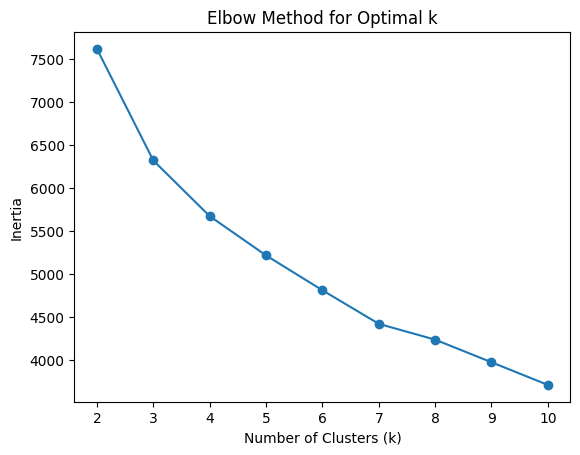

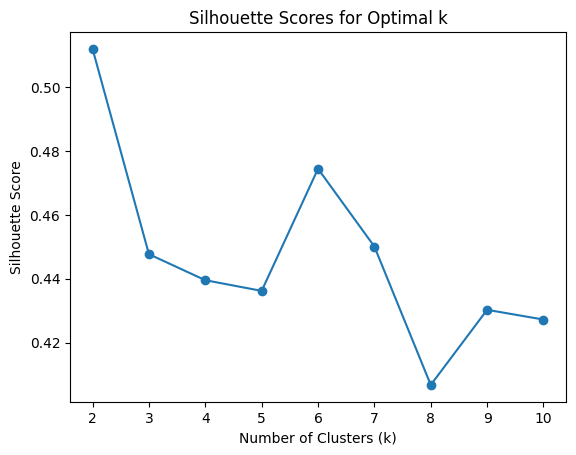

Silhouette Score: 0.4395400462086778


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

# Reload the original dataset to have all the columns
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

# Elbow Method to find optimal k
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

# Choose the best k based on the plots
best_k = 4  # Example: Choose the k with the highest silhouette score or the "elbow" point
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}")

In [23]:
# @title KMeans Scaled Data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters

# Store results
best_score = -1
best_n_clusters = 2

# Grid search for best parameters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(processed_data)

    # Silhouette score requires at least 2 clusters
    if len(np.unique(labels)) > 1:
        score = silhouette_score(processed_data, labels)
        print(f"n_clusters: {n_clusters}, Silhouette Score: {score:.3f}")

        # Track the best parameters
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print(f"\nBest n_clusters: {best_n_clusters}, Best Silhouette Score: {best_score:.3f}")

n_clusters: 2, Silhouette Score: 0.204
n_clusters: 3, Silhouette Score: 0.180
n_clusters: 4, Silhouette Score: 0.124
n_clusters: 5, Silhouette Score: 0.149
n_clusters: 6, Silhouette Score: 0.153
n_clusters: 7, Silhouette Score: 0.163
n_clusters: 8, Silhouette Score: 0.155
n_clusters: 9, Silhouette Score: 0.149

Best n_clusters: 2, Best Silhouette Score: 0.204


In [24]:
# @title KMeans Parameter Tuning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters

# Store results
best_score = -1
best_n_clusters = 2

# Grid search for best parameters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pca_df)

    # Silhouette score requires at least 2 clusters
    if len(np.unique(labels)) > 1:
        score = silhouette_score(pca_df, labels)
        print(f"n_clusters: {n_clusters}, Silhouette Score: {score:.3f}")

        # Track the best parameters
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print(f"\nBest n_clusters: {best_n_clusters}, Best Silhouette Score: {best_score:.3f}")

n_clusters: 2, Silhouette Score: 0.476
n_clusters: 3, Silhouette Score: 0.471
n_clusters: 4, Silhouette Score: 0.474
n_clusters: 5, Silhouette Score: 0.417
n_clusters: 6, Silhouette Score: 0.357
n_clusters: 7, Silhouette Score: 0.381
n_clusters: 8, Silhouette Score: 0.362
n_clusters: 9, Silhouette Score: 0.358

Best n_clusters: 2, Best Silhouette Score: 0.476


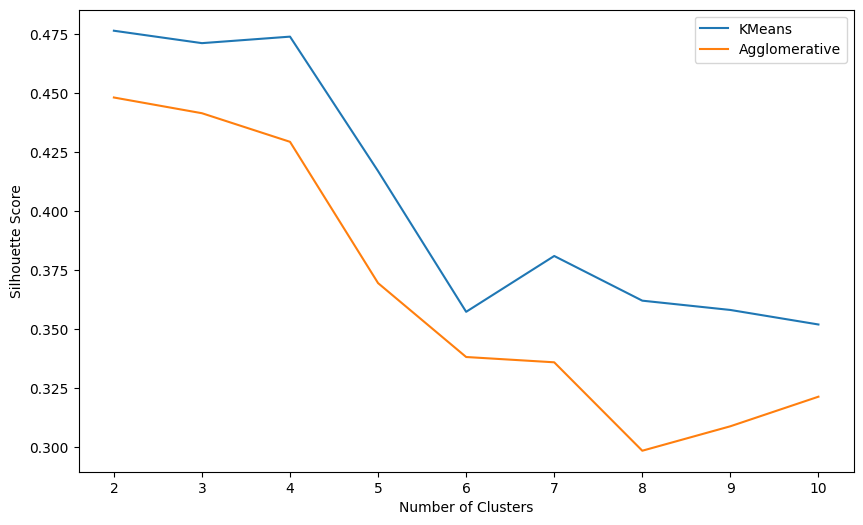

In [25]:
# @title Visualizing Optimal Number of Clusters using Silhouette Score

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test cluster numbers from 2 to 10
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    # Try both KMeans and Agglomerative Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    agglo = AgglomerativeClustering(n_clusters=n_clusters)

    # Calculate scores for both algorithms
    kmeans_score = silhouette_score(pca_df, kmeans.fit_predict(pca_df))
    agglo_score = silhouette_score(pca_df, agglo.fit_predict(pca_df))

    silhouette_scores.append((n_clusters, kmeans_score, agglo_score))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, [s[1] for s in silhouette_scores], label='KMeans')
plt.plot(cluster_range, [s[2] for s in silhouette_scores], label='Agglomerative')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.legend()
plt.show()

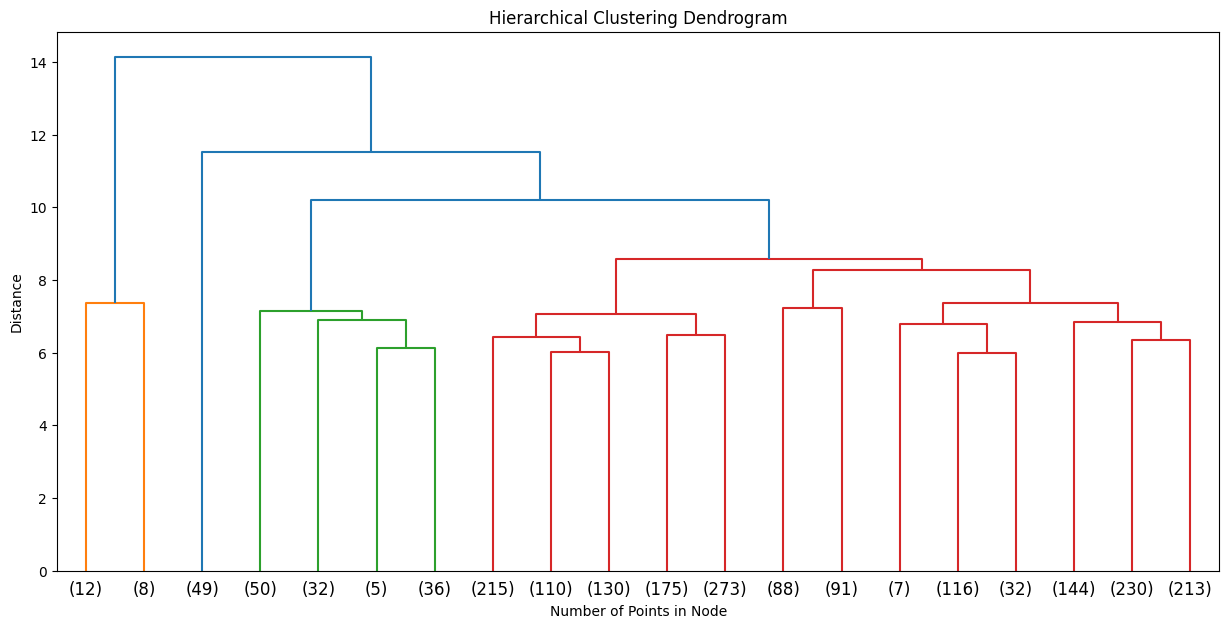

In [26]:
# @title Dendrogram Visualization for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# For 2 clusters:
agglo_2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_2 = agglo_2.fit_predict(scaled_df)

'''
# For 4 clusters:
agglo_4 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels_4 = agglo_4.fit_predict(scaled_df)
'''

# Calculate linkage matrix
Z = linkage(scaled_df, method='complete')

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Number of Points in Node')
plt.ylabel('Distance')
plt.show()

In [27]:
# @title Dendrogram Visualization for Hierarchical Clustering
from scipy.cluster.hierarchy import fcluster

max_d = 20

# Get cluster labels for each data point
cluster_labels = fcluster(Z, t=max_d, criterion='distance')

# Add the cluster labels to your original DataFrame (scaled_df in this case)
scaled_df['cluster_labels'] = cluster_labels


cluster_1_data = scaled_df[scaled_df['cluster_labels'] == 1]
print(cluster_1_data.describe())  # Prints descriptive statistics for cluster 1


             Income          Kids  Days_as_client       Recency      Expenses  \
count  2.016000e+03  2.016000e+03    2.016000e+03  2.016000e+03  2.016000e+03   
mean   9.163746e-17 -3.172066e-17   -1.312883e-16  4.317534e-17 -3.788856e-17   
std    1.000248e+00  1.000248e+00    1.000248e+00  1.000248e+00  1.000248e+00   
min   -2.417088e+00 -1.280487e+00   -1.740817e+00 -1.686541e+00 -1.003086e+00   
25%   -7.862872e-01 -1.280487e+00   -8.619271e-01 -8.584598e-01 -8.956536e-01   
50%   -1.194858e-02  6.192685e-02   -5.255982e-03  4.124660e-03 -3.467403e-01   
75%    7.981254e-01  6.192685e-02    8.711655e-01  8.667091e-01  7.380769e-01   
max    3.006357e+00  2.746755e+00    1.710555e+00  1.729294e+00  2.936668e+00   

       TotalNumPurchases  TotalAcceptedCmp      Complain      Response  \
count       2.016000e+03      2.016000e+03  2.016000e+03  2.016000e+03   
mean        5.198663e-17      1.762259e-17 -1.057355e-17 -3.524518e-18   
std         1.000248e+00      1.000248e+00  1.00

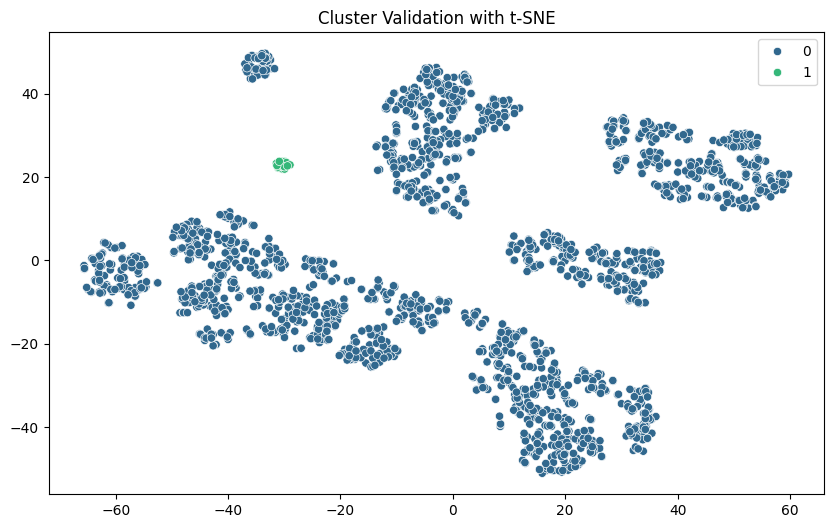

In [29]:
# Import TSNE
from sklearn.manifold import TSNE # Import TSNE from sklearn.manifold

tsne = TSNE(n_components=2, perplexity=30)
data_tsne = tsne.fit_transform(scaled_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=labels_2, palette='viridis')
plt.title('Cluster Validation with t-SNE')
plt.show()


In [31]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

def check_cluster_stability(data, cluster_method, n_iterations=10, **kwargs):

    stability_scores = []
    for _ in range(n_iterations):
        # Resample the data with replacement
        sample = resample(data, replace=True, random_state=42)

        # Fit the clustering model on the resampled data
        cluster_labels = cluster_method(**kwargs).fit_predict(sample)

        # Fit on original data
        original_labels = cluster_method(**kwargs).fit_predict(data)

        # Calculate and store ARI
        score = adjusted_rand_score(original_labels, cluster_labels)
        stability_scores.append(score)

    # Return the average ARI
    return np.mean(stability_scores)

# Example usage with Agglomerative Clustering (agglo_2):
from sklearn.cluster import AgglomerativeClustering

cluster_method = AgglomerativeClustering  # Specify the clustering method
stability_score = check_cluster_stability(
    scaled_df, cluster_method, n_clusters=2, linkage='complete'
)
print(f"Cluster Stability Score for Agglomerative Clustering (2 clusters, complete linkage): {stability_score:.3f}")

Cluster Stability Score for Agglomerative Clustering (2 clusters, complete linkage): -0.010


In [32]:
# @title Dendrogram Visualization for Hierarchical Clustering
from scipy.cluster.hierarchy import fcluster

max_d = 20

# Get cluster labels for each data point
cluster_labels = fcluster(Z, t=max_d, criterion='distance')

# Add the cluster labels to your *scaled_df* instead of the original df
scaled_df['cluster_labels'] = cluster_labels

# Analyze clusters (example for cluster 1)
cluster_1_data = scaled_df[scaled_df['cluster_labels'] == 1]  # Use scaled_df here
print(cluster_1_data.describe())  # Prints descriptive statistics for cluster 1

             Income          Kids  Days_as_client       Recency      Expenses  \
count  2.016000e+03  2.016000e+03    2.016000e+03  2.016000e+03  2.016000e+03   
mean   9.163746e-17 -3.172066e-17   -1.312883e-16  4.317534e-17 -3.788856e-17   
std    1.000248e+00  1.000248e+00    1.000248e+00  1.000248e+00  1.000248e+00   
min   -2.417088e+00 -1.280487e+00   -1.740817e+00 -1.686541e+00 -1.003086e+00   
25%   -7.862872e-01 -1.280487e+00   -8.619271e-01 -8.584598e-01 -8.956536e-01   
50%   -1.194858e-02  6.192685e-02   -5.255982e-03  4.124660e-03 -3.467403e-01   
75%    7.981254e-01  6.192685e-02    8.711655e-01  8.667091e-01  7.380769e-01   
max    3.006357e+00  2.746755e+00    1.710555e+00  1.729294e+00  2.936668e+00   

       TotalNumPurchases  TotalAcceptedCmp      Complain      Response  \
count       2.016000e+03      2.016000e+03  2.016000e+03  2.016000e+03   
mean        5.198663e-17      1.762259e-17 -1.057355e-17 -3.524518e-18   
std         1.000248e+00      1.000248e+00  1.00

In [33]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

def check_cluster_stability(data, cluster_method, n_iterations=10, **kwargs):

    stability_scores = []
    for _ in range(n_iterations):
        # Resample the data
        sample = resample(data, replace=True, random_state=42)

        # Fit the clustering model on the resampled data
        cluster_labels = cluster_method(**kwargs).fit_predict(sample)

        # Fit on original data
        original_labels = cluster_method(**kwargs).fit_predict(data)

        # Calculate and store ARI
        score = adjusted_rand_score(original_labels, cluster_labels)
        stability_scores.append(score)

    return np.mean(stability_scores)

# Example usage with Agglomerative Clustering:
from sklearn.cluster import AgglomerativeClustering

# Assuming 'scaled_df' is your preprocessed data
cluster_method = AgglomerativeClustering
stability_score = check_cluster_stability(
    scaled_df, cluster_method, n_clusters=2, linkage='ward'
)
print(f"Cluster Stability Score: {stability_score:.3f}")

Cluster Stability Score: 0.001


In [34]:
# @title Cluster Stability
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Function to check cluster stability
def check_cluster_stability(data, n_iterations=10):
    # For 2 clusters:
    agglo_2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
    labels_2 = agglo_2.fit_predict(data) # Define labels_2 here
    '''
    # For 4 clusters:
agglo_4 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels_4 = agglo_4.fit_predict(scaled_df)
'''

    stability_scores = []
    for _ in range(n_iterations):
        # Resample the data
        sample = resample(data, replace=True, random_state=42)

        # Fit the clustering model on the resampled data
        agglo = AgglomerativeClustering(n_clusters=2, linkage='complete')
        labels = agglo.fit_predict(sample)

        # Compare with original labels using Adjusted Rand Index
        if len(np.unique(labels_2)) > 1:  # Ensure at least 2 clusters
            score = adjusted_rand_score(labels_2, labels) # Use labels_2 here as well
            stability_scores.append(score)

    return np.mean(stability_scores)

# Check stability
stability_score = check_cluster_stability(processed_data)
print(f"Cluster Stability Score: {stability_score:.3f}")

Cluster Stability Score: -0.010


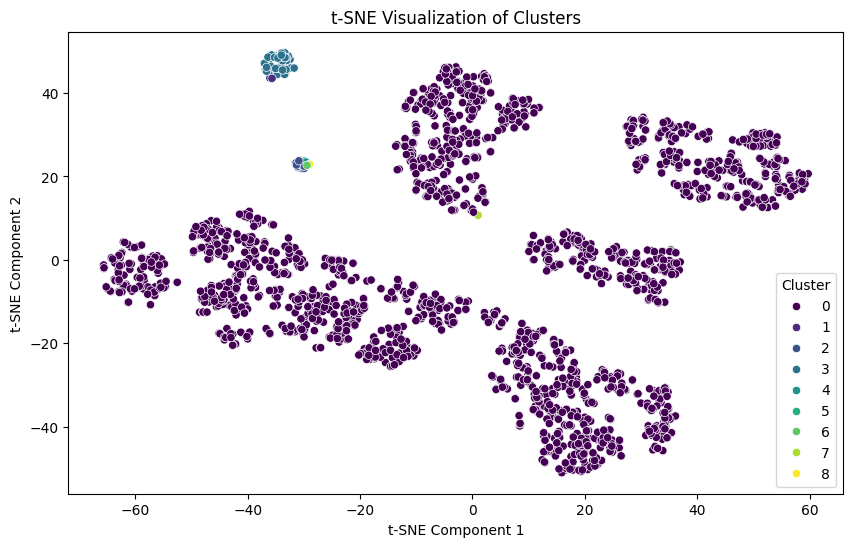

In [35]:
# @title Visual Validation (t-SNE)
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(processed_data)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=agglo_labels, palette='viridis', legend='full')
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()

In [37]:
# @title Statistical Tests to Validate Cluster Differences
from scipy.stats import ttest_ind, chi2_contingency
from scipy import stats # Import stats

# Assuming 'agglo_labels' contains your cluster labels from Agglomerative Clustering
# Instead of filtering the original 'df', use 'scaled_df' which has the 'Kids' column
# and then select the original columns you need for the statistical tests.

# Assign cluster labels to scaled_df (you might already have done this)
scaled_df['Cluster'] = labels_2  # Or use labels_2, labels_4, etc.

# Separate the data into clusters based on 'scaled_df'
cluster_0 = scaled_df[scaled_df['Cluster'] == 0]
cluster_1 = scaled_df[scaled_df['Cluster'] == 1]
#cluster_2 = scaled_df[scaled_df['Cluster'] == 2]
#cluster_3 = scaled_df[scaled_df['Cluster'] == 3]

# Perform t-tests/ANOVA for numerical features
numerical_features = ['Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses', 'TotalNumPurchases']
print("Numerical Features - T-Test/ANOVA Results:")
for feature in numerical_features:
    # Perform ANOVA for multiple groups
    fvalue, pvalue = stats.f_oneway(cluster_0[feature], cluster_1[feature]) #, cluster_2[feature], cluster_3[feature])
    print(f"{feature}: F-statistic = {fvalue:.3f}, p-value = {pvalue:.3f}")

# Perform chi-square tests for categorical features
# For categorical features, you'll need to access them from the original 'df'
# using the index of 'scaled_df'

categorical_features = ['Complain', 'Response', 'Education_Postgraduate', 'Education_Undergraduate', 'Marital_Status_Single']
print("\nCategorical Features - Chi-Square Test Results:")
for feature in categorical_features:
    # Use scaled_df for both Cluster and feature columns
    contingency_table = pd.crosstab(scaled_df['Cluster'], scaled_df[feature])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: chi2 = {chi2:.3f}, p-value = {p_value:.3f}")

Numerical Features - T-Test/ANOVA Results:
Income: F-statistic = 1.758, p-value = 0.185
Kids: F-statistic = 1.400, p-value = 0.237
Days_as_client: F-statistic = 1.819, p-value = 0.178
Recency: F-statistic = 0.118, p-value = 0.731
Expenses: F-statistic = 2.511, p-value = 0.113
TotalNumPurchases: F-statistic = 0.641, p-value = 0.423

Categorical Features - Chi-Square Test Results:
Complain: chi2 = 1915.475, p-value = 0.000
Response: chi2 = 0.000, p-value = 1.000
Education_Postgraduate: chi2 = 3.680, p-value = 0.055
Education_Undergraduate: chi2 = 0.000, p-value = 1.000
Marital_Status_Single: chi2 = 0.019, p-value = 0.889


In [38]:
# @title Generate Random Seeds Using My Name
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import hashlib  # Import hashlib

# Generate seeds using your existing method, but modulo by the max allowed value
input_strings = ["Aditya", "DataScience", "Clustering", "CustomerAnalysis", "SeedTest"]
max_seed_value = np.iinfo(np.int32).max  # Get maximum value for int32
seeds = [(int(hashlib.md5(s.encode()).hexdigest(), 16) % max_seed_value) for s in input_strings]

# Store KMeans results
kmeans_results = []

for seed in seeds:
    print(f"\nRunning KMeans with seed: {seed}")

    # 1. Initialize KMeans with current seed
    kmeans = KMeans(n_clusters=8, random_state=seed)

    # 2. Fit and predict
    labels = kmeans.fit_predict(scaled_df)

    # 3. Store results
    kmeans_results.append({
        'seed': seed,
        'labels': labels,
        'silhouette_score': silhouette_score(scaled_df, labels)
    })

# Compare results
print("\nKMeans Silhouette Scores:")
for result in kmeans_results:
    print(f"Seed {result['seed']}: {result['silhouette_score']:.3f}")

# Compare cluster consistency using ARI
print("\nCluster Consistency (Adjusted Rand Index):")
for i in range(len(kmeans_results)):
    for j in range(i+1, len(kmeans_results)):
        ari = adjusted_rand_score(
            kmeans_results[i]['labels'],
            kmeans_results[j]['labels']
        )
        print(f"Seed {kmeans_results[i]['seed']} vs {kmeans_results[j]['seed']}: {ari:.3f}")


Running KMeans with seed: 1454488683

Running KMeans with seed: 1348770665

Running KMeans with seed: 711726563

Running KMeans with seed: 356191625

Running KMeans with seed: 1948467524

KMeans Silhouette Scores:
Seed 1454488683: 0.173
Seed 1348770665: 0.145
Seed 711726563: 0.180
Seed 356191625: 0.168
Seed 1948467524: 0.170

Cluster Consistency (Adjusted Rand Index):
Seed 1454488683 vs 1348770665: 0.386
Seed 1454488683 vs 711726563: 0.619
Seed 1454488683 vs 356191625: 0.438
Seed 1454488683 vs 1948467524: 0.673
Seed 1348770665 vs 711726563: 0.458
Seed 1348770665 vs 356191625: 0.494
Seed 1348770665 vs 1948467524: 0.574
Seed 711726563 vs 356191625: 0.751
Seed 711726563 vs 1948467524: 0.501
Seed 356191625 vs 1948467524: 0.486


In [39]:
# @title Run Clustering with Different Seeds
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random  # Import the random module

# Store results for each seed
results = []

for seed in seeds:
    print(f"\nRunning clustering with seed: {seed}")
    random.seed(seed)

    # Perform clustering
    agglo = AgglomerativeClustering(n_clusters=2, linkage='complete')
    labels = agglo.fit_predict(scaled_df)

    # Evaluate clustering
    silhouette_avg = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Save results
    results.append({
        'seed': seed,
        'labels': labels,
        'silhouette_score': silhouette_avg
    })


Running clustering with seed: 1454488683
Silhouette Score: 0.600

Running clustering with seed: 1348770665
Silhouette Score: 0.600

Running clustering with seed: 711726563
Silhouette Score: 0.600

Running clustering with seed: 356191625
Silhouette Score: 0.600

Running clustering with seed: 1948467524
Silhouette Score: 0.600


In [40]:
# @title Compare Results Across Seeds
# Compare labels across seeds
from sklearn.metrics import adjusted_rand_score

# Compare each pair of clustering results
for i in range(len(results)):
    for j in range(i + 1, len(results)):
        labels_i = results[i]['labels']
        labels_j = results[j]['labels']

        # Calculate Adjusted Rand Index (ARI) to compare clusterings
        ari = adjusted_rand_score(labels_i, labels_j)
        print(f"Seed {results[i]['seed']} vs Seed {results[j]['seed']}: ARI = {ari:.3f}")

# Compare silhouette scores
print("\nSilhouette Scores Across Seeds:")
for result in results:
    print(f"Seed {result['seed']}: Silhouette Score = {result['silhouette_score']:.3f}")

Seed 1454488683 vs Seed 1348770665: ARI = 1.000
Seed 1454488683 vs Seed 711726563: ARI = 1.000
Seed 1454488683 vs Seed 356191625: ARI = 1.000
Seed 1454488683 vs Seed 1948467524: ARI = 1.000
Seed 1348770665 vs Seed 711726563: ARI = 1.000
Seed 1348770665 vs Seed 356191625: ARI = 1.000
Seed 1348770665 vs Seed 1948467524: ARI = 1.000
Seed 711726563 vs Seed 356191625: ARI = 1.000
Seed 711726563 vs Seed 1948467524: ARI = 1.000
Seed 356191625 vs Seed 1948467524: ARI = 1.000

Silhouette Scores Across Seeds:
Seed 1454488683: Silhouette Score = 0.600
Seed 1348770665: Silhouette Score = 0.600
Seed 711726563: Silhouette Score = 0.600
Seed 356191625: Silhouette Score = 0.600
Seed 1948467524: Silhouette Score = 0.600


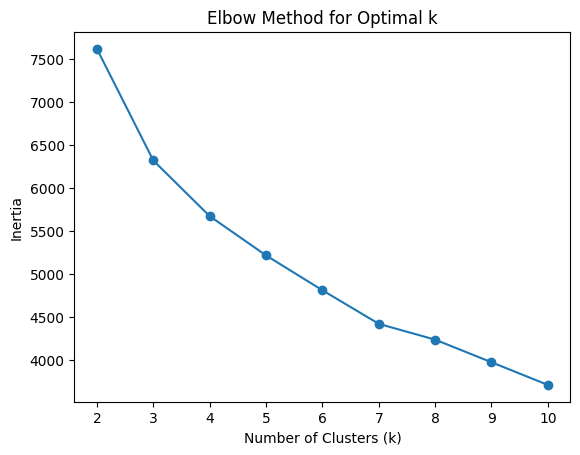

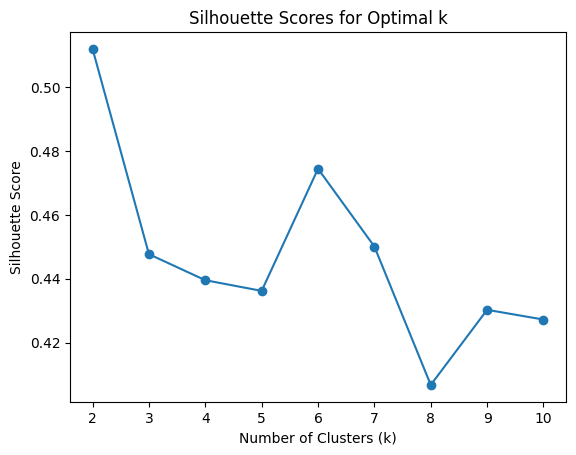

Silhouette Score: 0.5120266845650243


In [42]:
# @title Fine-Tuning K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

# Reload the original dataset to have all the columns
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

# Elbow Method to find optimal k
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

# Choose the best k based on the plots
best_k = 2  # Example: Choose the k with the highest silhouette score or the "elbow" point
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}")

K-Means Cluster Summary:
                         ID   Year_Birth        Income   Kidhome  Teenhome  \
KMeans_Cluster                                                               
0               5611.428478  1969.332677  42320.051061  0.614829  0.584646   
1               5551.146648  1967.684358  73391.627119  0.081006  0.339385   

                  Recency    MntWines  MntFruits  MntMeatProducts  \
KMeans_Cluster                                                      
0               48.776247  161.125984   7.893701        52.402887   
1               49.818436  607.905028  65.484637       410.762570   

                MntFishProducts  ...  AcceptedCmp4  AcceptedCmp5  \
KMeans_Cluster                   ...                               
0                     11.219160  ...      0.055774      0.010499   
1                     93.518156  ...      0.114525      0.205307   

                AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
KMeans_Cluster                           

<ipython-input-43-981de502d4fe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kmeans_cluster_summary.index, y=kmeans_cluster_summary['Income'], palette='viridis')


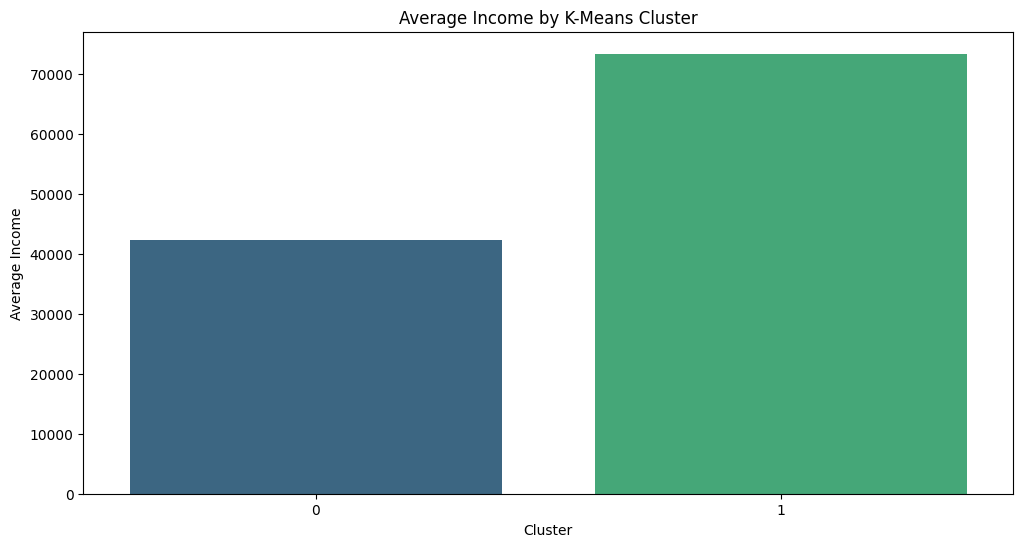

<ipython-input-43-981de502d4fe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kmeans_cluster_summary.index, y=kmeans_cluster_summary['Total_Spending'], palette='viridis')


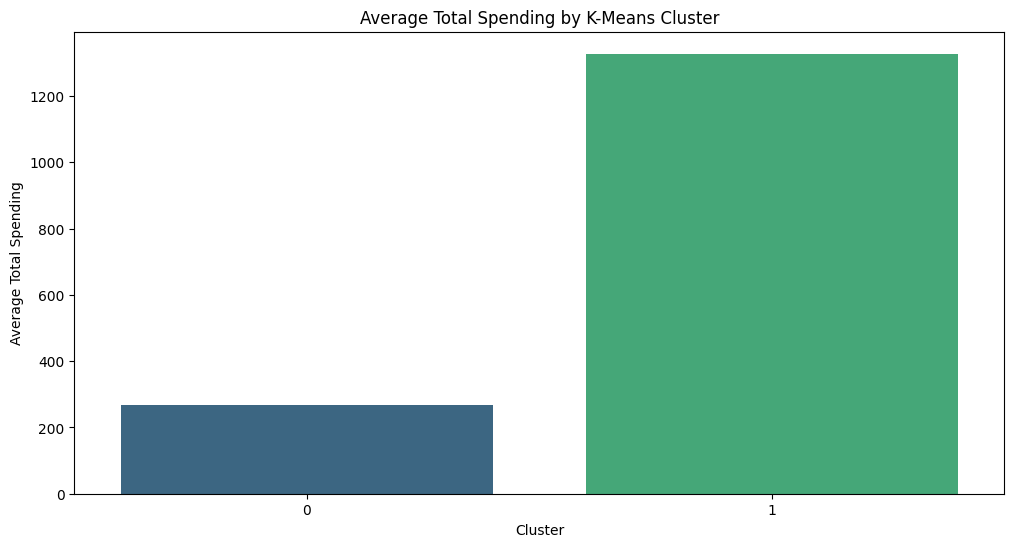

In [43]:
# @title Group by K-Means clusters and calculate mean values
# Group by K-Means clusters and calculate mean values only for numerical columns
# Calculate Total Spending (adjust columns as needed)
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                      df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

kmeans_cluster_summary = df.groupby('KMeans_Cluster').agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})

print("K-Means Cluster Summary:")
print(kmeans_cluster_summary)

# Visualize cluster characteristics (update column names if needed)
plt.figure(figsize=(12, 6))
sns.barplot(x=kmeans_cluster_summary.index, y=kmeans_cluster_summary['Income'], palette='viridis')
plt.title('Average Income by K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=kmeans_cluster_summary.index, y=kmeans_cluster_summary['Total_Spending'], palette='viridis')
plt.title('Average Total Spending by K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.show()

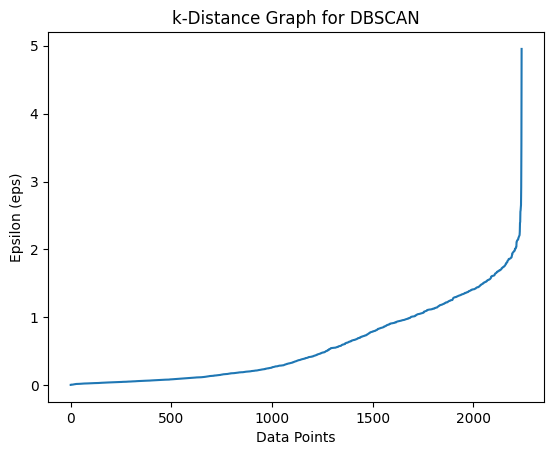

Number of clusters: 3
Silhouette Score: 0.14389534766829842


In [44]:
# @title Fine-Tuning DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# k-distance plot to find eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)  # Sort distances

# Plot k-distance graph
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon (eps)')
plt.title('k-Distance Graph for DBSCAN')
plt.show()

# Choose eps based on the "elbow" in the plot
eps = 0.5  # Example: Choose the point where the curve starts to rise sharply

# Fine-tune DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=5)  # Adjust min_samples as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Evaluate clustering
print(f"Number of clusters: {len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)}")
print(f"Silhouette Score: {silhouette_score(X_scaled, dbscan.labels_) if len(set(dbscan.labels_)) > 1 else 'Not applicable'}")

DBSCAN Cluster Summary:
                         ID   Year_Birth        Income   Kidhome  Teenhome  \
DBSCAN_Cluster                                                               
-1              5604.579914  1967.423326  69968.414847  0.109071  0.416847   
 0              5581.634896  1969.832437  39530.895105  0.686395  0.568793   
 1              6646.333333  1970.500000  59994.666667  0.166667  0.833333   
 2              5001.714286  1959.428571  64658.714286  0.000000  0.428571   

                  Recency    MntWines  MntFruits  MntMeatProducts  \
DBSCAN_Cluster                                                      
-1              49.140389  557.369330  55.903888       353.622030   
 0              49.040738  122.043044   5.114527        34.494235   
 1              61.833333  177.000000  44.333333       100.166667   
 2              46.857143  693.142857  32.857143       148.000000   

                MntFishProducts  ...  AcceptedCmp4  AcceptedCmp5  \
DBSCAN_Cluster          

<ipython-input-45-47a7c329dc5e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dbscan_cluster_summary.index, y=dbscan_cluster_summary['Income'], palette='viridis')


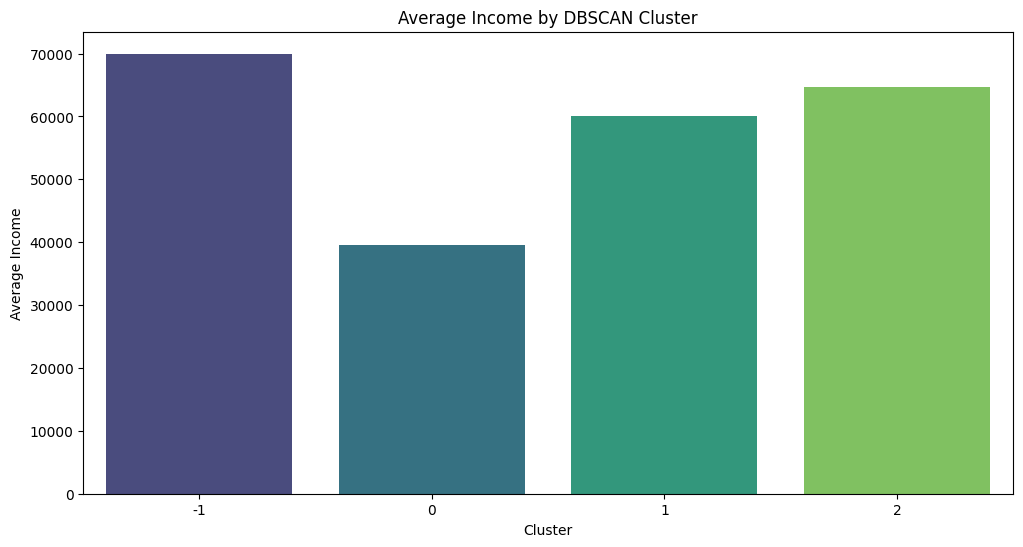

<ipython-input-45-47a7c329dc5e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dbscan_cluster_summary.index, y=dbscan_cluster_summary['Total_Spending'], palette='viridis')


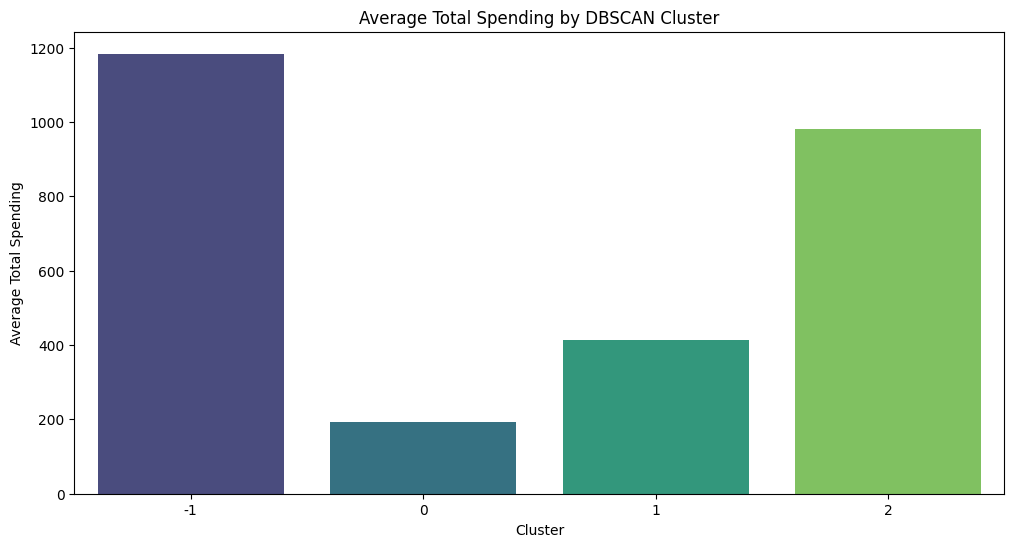

Number of noise points: 926


In [45]:
# @title Interpreting DBSCAN Clusters
# Group by DBSCAN clusters and calculate mean values

# Include numeric_only=True to calculate the mean for numerical columns only
dbscan_cluster_summary = df.groupby('DBSCAN_Cluster').mean(numeric_only=True)
print("DBSCAN Cluster Summary:")
print(dbscan_cluster_summary)

# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
sns.barplot(x=dbscan_cluster_summary.index, y=dbscan_cluster_summary['Income'], palette='viridis')
plt.title('Average Income by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=dbscan_cluster_summary.index, y=dbscan_cluster_summary['Total_Spending'], palette='viridis')
plt.title('Average Total Spending by DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.show()

# Handle noise points (cluster = -1)
noise_points = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")

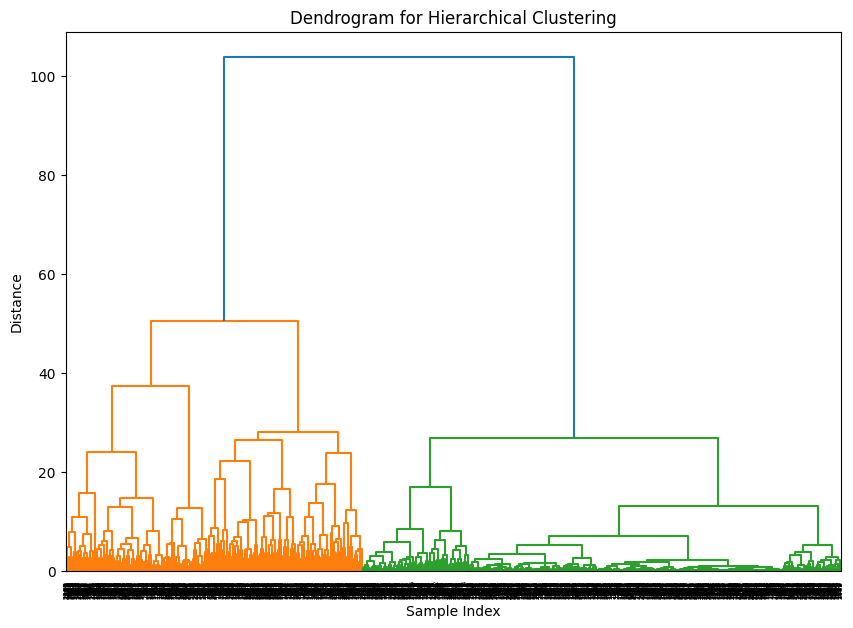

Silhouette Score: 0.4774059779692332


In [46]:
# @title Fine-Tuning Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Plot dendrogram to find optimal number of clusters
linked = linkage(X_scaled, method='ward')  # Use 'ward' linkage for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters based on the dendrogram
best_n_clusters = 2  # Example: Choose the number of clusters where the dendrogram shows the longest vertical lines

# Fine-tune Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
df['Hierarchical_Cluster'] = agglo.fit_predict(X_scaled)

# Evaluate clustering
print(f"Silhouette Score: {silhouette_score(X_scaled, agglo.labels_)}")

Hierarchical Cluster Summary:
                               ID   Year_Birth        Income   Kidhome  \
Hierarchical_Cluster                                                     
0                     5574.307334  1967.641444  70361.027059  0.101281   
1                     5603.264301  1969.530051  40975.868228  0.657495   

                      Teenhome    Recency    MntWines  MntFruits  \
Hierarchical_Cluster                                               
0                     0.393481  49.408615  600.642608  56.433062   
1                     0.576394  48.923244  119.380159   7.560463   

                      MntMeatProducts  MntFishProducts  ...  AcceptedCmp5  \
Hierarchical_Cluster                                    ...                 
0                          364.030268        80.316647  ...      0.181607   
1                           44.363505        10.908762  ...      0.005069   

                      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
Hierarchical_C

<ipython-input-47-3ff1c09e8cae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hierarchical_cluster_summary.index, y=hierarchical_cluster_summary['Income'], palette='viridis')


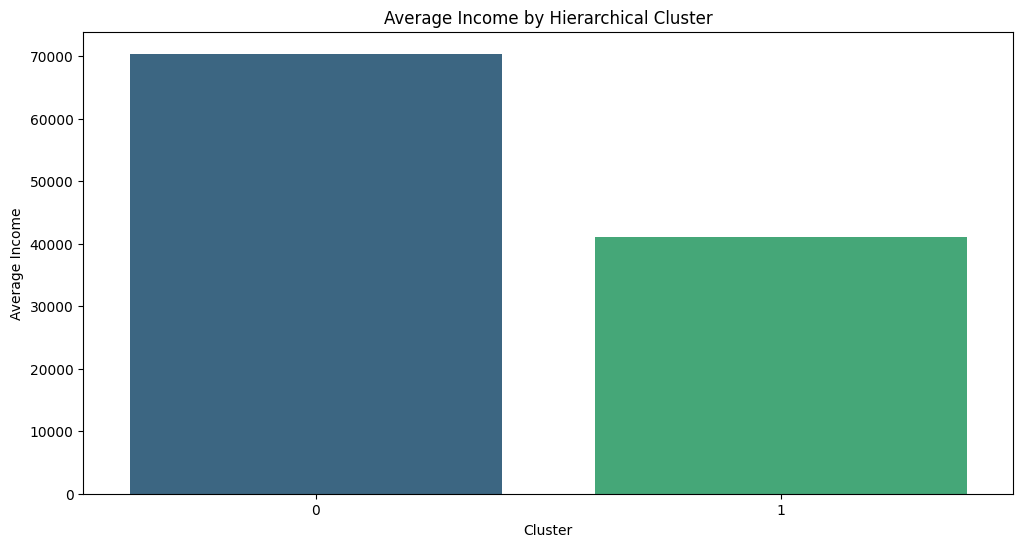

<ipython-input-47-3ff1c09e8cae>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hierarchical_cluster_summary.index, y=hierarchical_cluster_summary['Total_Spending'], palette='viridis')


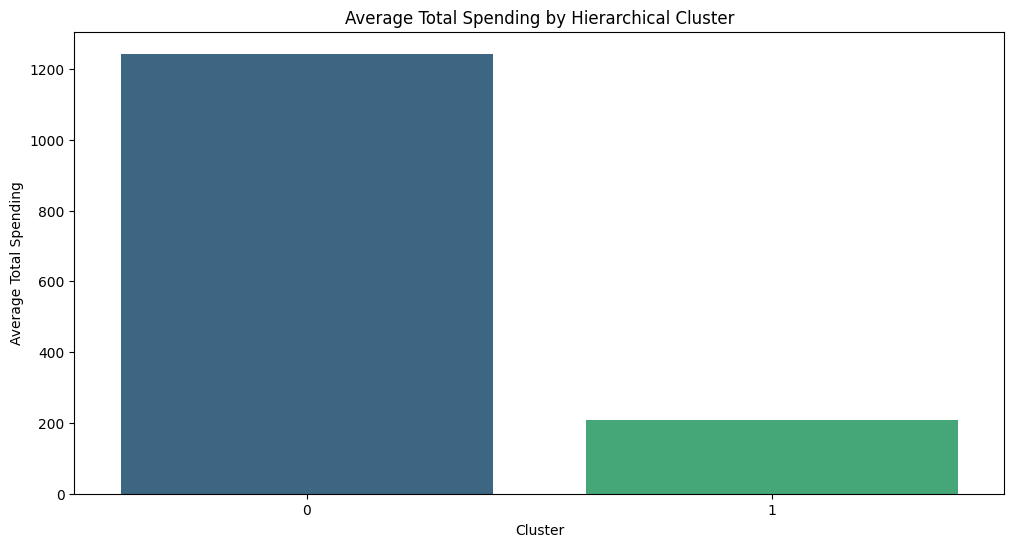

In [47]:
# @title Interpreting Hierarchical Clusters
# Group by Hierarchical clusters and calculate mean values
# Include numeric_only=True to calculate the mean for numerical columns only
hierarchical_cluster_summary = df.groupby('Hierarchical_Cluster').mean(numeric_only=True)
print("Hierarchical Cluster Summary:")
print(hierarchical_cluster_summary)

# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
sns.barplot(x=hierarchical_cluster_summary.index, y=hierarchical_cluster_summary['Income'], palette='viridis')
plt.title('Average Income by Hierarchical Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=hierarchical_cluster_summary.index, y=hierarchical_cluster_summary['Total_Spending'], palette='viridis')
plt.title('Average Total Spending by Hierarchical Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.show()

K-Means Silhouette Score: 0.5120266845650243
DBSCAN Silhouette Score: 0.14389534766829842
Hierarchical Clustering Silhouette Score: 0.4774059779692332


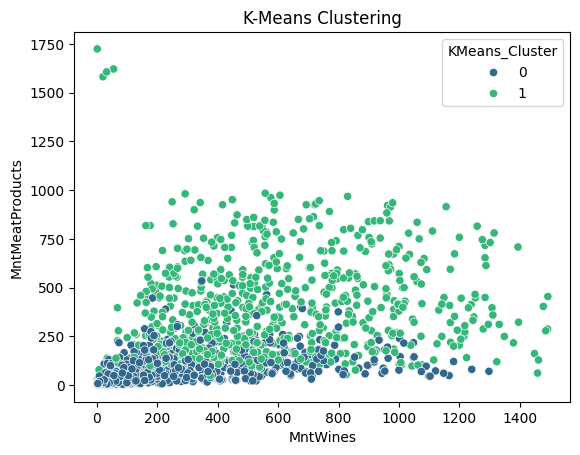

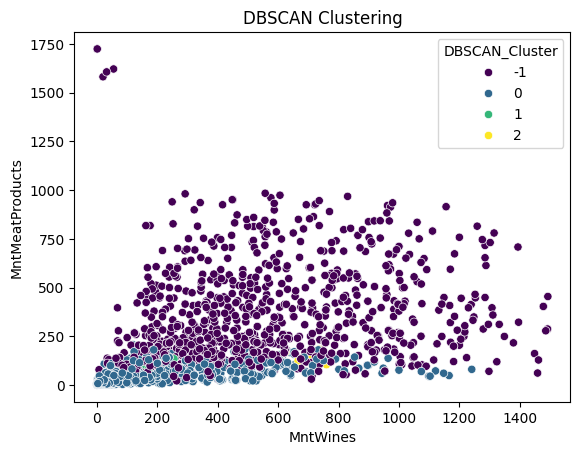

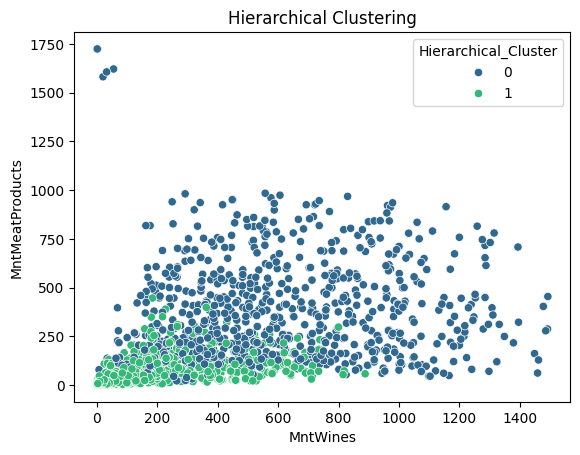

In [48]:
# @title Comparing All Three Models
# Compare Silhouette Scores
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, df['KMeans_Cluster'])}")
print(f"DBSCAN Silhouette Score: {silhouette_score(X_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else 'Not applicable'}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(X_scaled, df['Hierarchical_Cluster'])}")

# Visualize clusters for each model
sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [49]:
# @title Cluster stability score for all three of these clustering menthods

import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

def check_cluster_stability(data, cluster_method, n_iterations=10, **kwargs):
    stability_scores = []
    for _ in range(n_iterations):
        # Resample the data
        sample = resample(data, replace=True, random_state=42)

        # Fit the clustering model
        cluster_labels = cluster_method(**kwargs).fit_predict(sample)
        original_labels = cluster_method(**kwargs).fit_predict(data)

        # Calculate and store ARI
        score = adjusted_rand_score(original_labels, cluster_labels)
        stability_scores.append(score)

    return np.mean(stability_scores)

# Assuming 'scaled_df' is your preprocessed data
# Example usage for KMeans:
kmeans_stability = check_cluster_stability(scaled_df, KMeans, n_clusters=2, random_state=42)
print(f"KMeans Cluster Stability: {kmeans_stability:.3f}")

# Example usage for DBSCAN:
dbscan_stability = check_cluster_stability(scaled_df, DBSCAN, eps=0.5, min_samples=5)
print(f"DBSCAN Cluster Stability: {dbscan_stability:.3f}")

# Example usage for Agglomerative Clustering:
agglomerative_stability = check_cluster_stability(scaled_df, AgglomerativeClustering, n_clusters=2, linkage='ward')
print(f"Agglomerative Clustering Stability: {agglomerative_stability:.3f}")


KMeans Cluster Stability: 0.003
DBSCAN Cluster Stability: 0.006
Agglomerative Clustering Stability: 0.001


In [50]:
# prompt: Statistical Tests to Validate Cluster Differences

import pandas as pd
from scipy.stats import chi2_contingency, f_oneway
from sklearn.metrics import adjusted_rand_score

# Assuming 'scaled_df' contains your data and 'labels_2' contains cluster labels
# and 'df' is the original DataFrame before scaling.

# Separate the data into clusters
cluster_0 = scaled_df[scaled_df['Cluster'] == 0]
cluster_1 = scaled_df[scaled_df['Cluster'] == 1]

# Perform statistical tests

# Numerical features
numerical_features = ['Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses', 'TotalNumPurchases']
print("Numerical Features - T-Test/ANOVA Results:")
for feature in numerical_features:
    # Perform ANOVA for multiple groups
    fvalue, pvalue = f_oneway(cluster_0[feature], cluster_1[feature])
    print(f"{feature}: F-statistic = {fvalue:.3f}, p-value = {pvalue:.3f}")

# Categorical features
categorical_features = ['Complain', 'Response', 'Education_Postgraduate', 'Education_Undergraduate', 'Marital_Status_Single']
print("\nCategorical Features - Chi-Square Test Results:")
for feature in categorical_features:
    # Use scaled_df for both Cluster and feature columns
    contingency_table = pd.crosstab(scaled_df['Cluster'], scaled_df[feature])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: chi2 = {chi2:.3f}, p-value = {p_value:.3f}")


Numerical Features - T-Test/ANOVA Results:
Income: F-statistic = 1.758, p-value = 0.185
Kids: F-statistic = 1.400, p-value = 0.237
Days_as_client: F-statistic = 1.819, p-value = 0.178
Recency: F-statistic = 0.118, p-value = 0.731
Expenses: F-statistic = 2.511, p-value = 0.113
TotalNumPurchases: F-statistic = 0.641, p-value = 0.423

Categorical Features - Chi-Square Test Results:
Complain: chi2 = 1915.475, p-value = 0.000
Response: chi2 = 0.000, p-value = 1.000
Education_Postgraduate: chi2 = 3.680, p-value = 0.055
Education_Undergraduate: chi2 = 0.000, p-value = 1.000
Marital_Status_Single: chi2 = 0.019, p-value = 0.889


In [41]:
# @title Save the Results
# Save the clustered data to a new CSV file
df.to_csv('clustered_data.csv', index=False)

print("Clustered data saved to 'clustered_data.csv'.")

Clustered data saved to 'clustered_data.csv'.
